In [1]:
#import libraries
import keras
from keras.preprocessing.image import ImageDataGenerator
from keras.optimizers import Adam
from keras.callbacks import ModelCheckpoint
import matplotlib.pyplot as plt

import pickle

In [3]:
keras.__version__
 

'2.4.3'

In [4]:
train_data_path = 'C:/Users/HOME/Datasets/train'
validation_data_path = '/C:/Users/HOME/Datasets/test'
 

In [5]:
def plotImages(images_arr):
    fig, axes = plt.subplots(1, 5, figsize=(20, 20))
    axes = axes.flatten()
    for img, ax in zip(images_arr, axes):
        ax.imshow(img)
    plt.tight_layout()
    plt.show()
 

In [7]:
 
# this is the augmentation configuration we will use for training
# It generate more images using below parameters
training_datagen = ImageDataGenerator(rescale=1./255,
                                      rotation_range=40,
                                      width_shift_range=0.2,
                                      height_shift_range=0.2,
                                      shear_range=0.2,
                                      zoom_range=0.2,
                                      horizontal_flip=True,
                                      fill_mode='nearest')
 

In [8]:
# this is a generator that will read pictures found in
# at train_data_path, and indefinitely generate
# batches of augmented image data
training_data = training_datagen.flow_from_directory('C:/Users/HOME/Datasets/train', # this is the target directory
                                      target_size=(150, 150), # all images will be resized to 150x150
                                      batch_size=32,
                                      class_mode='binary')  # since we use binary_crossentropy loss, we need binary labels
 

Found 1951 images belonging to 4 classes.


In [9]:

# this is the augmentation configuration we will use for validation:
# only rescaling
valid_datagen = ImageDataGenerator(rescale=1./255)
 

Found 18 images belonging to 4 classes.


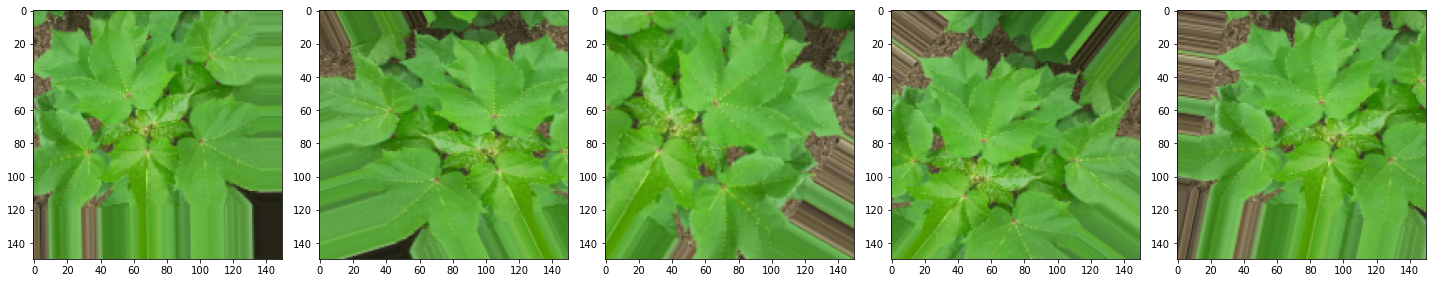

In [10]:

# this is a similar generator, for validation data
valid_data = valid_datagen.flow_from_directory('C:/Users/HOME/Datasets/test',
                                  target_size=(150,150),
                                  batch_size=32,
                                  class_mode='binary')
 
images = [training_data[0][0][0] for i in range(5)]
plotImages(images)
 

TypeError: cannot pickle '_thread.RLock' object

In [11]:
model_path = 'C:/Users/HOME/Datasets/v3_red_cott_dis.h5'
checkpoint = ModelCheckpoint(model_path, monitor='val_accuracy', verbose=1, save_best_only=True, mode='max')
callbacks_list = [checkpoint]
 

In [12]:

#Building cnn model
cnn_model = keras.models.Sequential([
                                    keras.layers.Conv2D(filters=32, kernel_size=3, input_shape=[150, 150, 3]),
                                    keras.layers.MaxPooling2D(pool_size=(2,2)),
                                    keras.layers.Conv2D(filters=64, kernel_size=3),
                                    keras.layers.MaxPooling2D(pool_size=(2,2)),
                                    keras.layers.Conv2D(filters=128, kernel_size=3),
                                    keras.layers.MaxPooling2D(pool_size=(2,2)),                                    
                                    keras.layers.Conv2D(filters=256, kernel_size=3),
                                    keras.layers.MaxPooling2D(pool_size=(2,2)),
 
                                    keras.layers.Dropout(0.5),                                                                        
                                    keras.layers.Flatten(), # neural network beulding
                                    keras.layers.Dense(units=128, activation='relu'), # input layers
                                    keras.layers.Dropout(0.1),                                    
                                    keras.layers.Dense(units=256, activation='relu'),                                    
                                    keras.layers.Dropout(0.25),                                    
                                    keras.layers.Dense(units=4, activation='softmax') # output layer
])
 

In [13]:
# compile cnn model
cnn_model.compile(optimizer = Adam(lr=0.0001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])
 
# train cnn model
history = cnn_model.fit(training_data, 
                          epochs=500, 
                          verbose=1, 
                          validation_data= valid_data,
                          callbacks=callbacks_list) # time start 16.06
 

Epoch 1/500
61/61 [==============================] - ETA: 0s - loss: 1.2149 - accuracy: 0.4700
Epoch 00001: val_accuracy improved from -inf to 0.55556, saving model to C:/Users/HOME/Datasets\v3_red_cott_dis.h5
61/61 [==============================] - 84s 1s/step - loss: 1.2149 - accuracy: 0.4700 - val_loss: 1.0026 - val_accuracy: 0.5556
Epoch 2/500
61/61 [==============================] - ETA: 0s - loss: 1.0229 - accuracy: 0.5556
Epoch 00002: val_accuracy did not improve from 0.55556
61/61 [==============================] - 80s 1s/step - loss: 1.0229 - accuracy: 0.5556 - val_loss: 1.0015 - val_accuracy: 0.5556
Epoch 3/500
61/61 [==============================] - ETA: 0s - loss: 0.9333 - accuracy: 0.6156
Epoch 00003: val_accuracy improved from 0.55556 to 0.61111, saving model to C:/Users/HOME/Datasets\v3_red_cott_dis.h5
61/61 [==============================] - 80s 1s/step - loss: 0.9333 - accuracy: 0.6156 - val_loss: 0.9125 - val_accuracy: 0.6111
Epoch 4/500
61/61 [=====================

Epoch 30/500
61/61 [==============================] - ETA: 0s - loss: 0.3834 - accuracy: 0.8611
Epoch 00030: val_accuracy did not improve from 0.83333
61/61 [==============================] - 83s 1s/step - loss: 0.3834 - accuracy: 0.8611 - val_loss: 0.4851 - val_accuracy: 0.7222
Epoch 31/500
61/61 [==============================] - ETA: 0s - loss: 0.3842 - accuracy: 0.8483
Epoch 00031: val_accuracy did not improve from 0.83333
61/61 [==============================] - 92s 2s/step - loss: 0.3842 - accuracy: 0.8483 - val_loss: 0.5450 - val_accuracy: 0.7778
Epoch 32/500
61/61 [==============================] - ETA: 0s - loss: 0.4066 - accuracy: 0.8411
Epoch 00032: val_accuracy did not improve from 0.83333
61/61 [==============================] - 87s 1s/step - loss: 0.4066 - accuracy: 0.8411 - val_loss: 0.7484 - val_accuracy: 0.6667
Epoch 33/500
61/61 [==============================] - ETA: 0s - loss: 0.3983 - accuracy: 0.8473
Epoch 00033: val_accuracy did not improve from 0.83333
61/61 [==

61/61 [==============================] - ETA: 0s - loss: 0.3225 - accuracy: 0.8713
Epoch 00059: val_accuracy did not improve from 1.00000
61/61 [==============================] - 89s 1s/step - loss: 0.3225 - accuracy: 0.8713 - val_loss: 0.6484 - val_accuracy: 0.7222
Epoch 60/500
61/61 [==============================] - ETA: 0s - loss: 0.2729 - accuracy: 0.8929
Epoch 00060: val_accuracy did not improve from 1.00000
61/61 [==============================] - 89s 1s/step - loss: 0.2729 - accuracy: 0.8929 - val_loss: 0.3764 - val_accuracy: 0.9444
Epoch 61/500
61/61 [==============================] - ETA: 0s - loss: 0.2907 - accuracy: 0.8903
Epoch 00061: val_accuracy did not improve from 1.00000
61/61 [==============================] - 89s 1s/step - loss: 0.2907 - accuracy: 0.8903 - val_loss: 0.4394 - val_accuracy: 0.7778
Epoch 62/500
61/61 [==============================] - ETA: 0s - loss: 0.2638 - accuracy: 0.9031
Epoch 00062: val_accuracy did not improve from 1.00000
61/61 [===============

61/61 [==============================] - ETA: 0s - loss: 0.2651 - accuracy: 0.8970
Epoch 00088: val_accuracy did not improve from 1.00000
61/61 [==============================] - 80s 1s/step - loss: 0.2651 - accuracy: 0.8970 - val_loss: 0.2363 - val_accuracy: 0.8333
Epoch 89/500
61/61 [==============================] - ETA: 0s - loss: 0.2444 - accuracy: 0.9144
Epoch 00089: val_accuracy did not improve from 1.00000
61/61 [==============================] - 79s 1s/step - loss: 0.2444 - accuracy: 0.9144 - val_loss: 0.6551 - val_accuracy: 0.7778
Epoch 90/500
61/61 [==============================] - ETA: 0s - loss: 0.2396 - accuracy: 0.9118
Epoch 00090: val_accuracy did not improve from 1.00000
61/61 [==============================] - 79s 1s/step - loss: 0.2396 - accuracy: 0.9118 - val_loss: 0.3748 - val_accuracy: 0.7222
Epoch 91/500
61/61 [==============================] - ETA: 0s - loss: 0.2658 - accuracy: 0.9042
Epoch 00091: val_accuracy did not improve from 1.00000
61/61 [===============

61/61 [==============================] - ETA: 0s - loss: 0.1993 - accuracy: 0.9272
Epoch 00117: val_accuracy did not improve from 1.00000
61/61 [==============================] - 85s 1s/step - loss: 0.1993 - accuracy: 0.9272 - val_loss: 0.3115 - val_accuracy: 0.8889
Epoch 118/500
61/61 [==============================] - ETA: 0s - loss: 0.2014 - accuracy: 0.9216
Epoch 00118: val_accuracy did not improve from 1.00000
61/61 [==============================] - 92s 2s/step - loss: 0.2014 - accuracy: 0.9216 - val_loss: 0.5343 - val_accuracy: 0.8333
Epoch 119/500
61/61 [==============================] - ETA: 0s - loss: 0.2039 - accuracy: 0.9282
Epoch 00119: val_accuracy did not improve from 1.00000
61/61 [==============================] - 91s 1s/step - loss: 0.2039 - accuracy: 0.9282 - val_loss: 0.3639 - val_accuracy: 0.7778
Epoch 120/500
61/61 [==============================] - ETA: 0s - loss: 0.2294 - accuracy: 0.9190
Epoch 00120: val_accuracy did not improve from 1.00000
61/61 [============

61/61 [==============================] - ETA: 0s - loss: 0.1677 - accuracy: 0.9431
Epoch 00146: val_accuracy did not improve from 1.00000
61/61 [==============================] - 108s 2s/step - loss: 0.1677 - accuracy: 0.9431 - val_loss: 0.6474 - val_accuracy: 0.7222
Epoch 147/500
61/61 [==============================] - ETA: 0s - loss: 0.1843 - accuracy: 0.9293
Epoch 00147: val_accuracy did not improve from 1.00000
61/61 [==============================] - 101s 2s/step - loss: 0.1843 - accuracy: 0.9293 - val_loss: 0.2395 - val_accuracy: 0.9444
Epoch 148/500
61/61 [==============================] - ETA: 0s - loss: 0.1851 - accuracy: 0.9313
Epoch 00148: val_accuracy did not improve from 1.00000
61/61 [==============================] - 97s 2s/step - loss: 0.1851 - accuracy: 0.9313 - val_loss: 0.0702 - val_accuracy: 1.0000
Epoch 149/500
61/61 [==============================] - ETA: 0s - loss: 0.1842 - accuracy: 0.9329
Epoch 00149: val_accuracy did not improve from 1.00000
61/61 [==========

61/61 [==============================] - ETA: 0s - loss: 0.1517 - accuracy: 0.9446
Epoch 00175: val_accuracy did not improve from 1.00000
61/61 [==============================] - 80s 1s/step - loss: 0.1517 - accuracy: 0.9446 - val_loss: 0.1532 - val_accuracy: 0.9444
Epoch 176/500
61/61 [==============================] - ETA: 0s - loss: 0.1702 - accuracy: 0.9426
Epoch 00176: val_accuracy did not improve from 1.00000
61/61 [==============================] - 82s 1s/step - loss: 0.1702 - accuracy: 0.9426 - val_loss: 0.2688 - val_accuracy: 0.8889
Epoch 177/500
61/61 [==============================] - ETA: 0s - loss: 0.1666 - accuracy: 0.9411
Epoch 00177: val_accuracy did not improve from 1.00000
61/61 [==============================] - 81s 1s/step - loss: 0.1666 - accuracy: 0.9411 - val_loss: 0.1176 - val_accuracy: 0.9444
Epoch 178/500
61/61 [==============================] - ETA: 0s - loss: 0.1559 - accuracy: 0.9518
Epoch 00178: val_accuracy did not improve from 1.00000
61/61 [============

61/61 [==============================] - ETA: 0s - loss: 0.1236 - accuracy: 0.9610
Epoch 00204: val_accuracy did not improve from 1.00000
61/61 [==============================] - 80s 1s/step - loss: 0.1236 - accuracy: 0.9610 - val_loss: 1.5417 - val_accuracy: 0.7222
Epoch 205/500
61/61 [==============================] - ETA: 0s - loss: 0.1474 - accuracy: 0.9544
Epoch 00205: val_accuracy did not improve from 1.00000
61/61 [==============================] - 82s 1s/step - loss: 0.1474 - accuracy: 0.9544 - val_loss: 0.1702 - val_accuracy: 0.8889
Epoch 206/500
61/61 [==============================] - ETA: 0s - loss: 0.1258 - accuracy: 0.9564
Epoch 00206: val_accuracy did not improve from 1.00000
61/61 [==============================] - 81s 1s/step - loss: 0.1258 - accuracy: 0.9564 - val_loss: 0.1825 - val_accuracy: 0.8889
Epoch 207/500
61/61 [==============================] - ETA: 0s - loss: 0.1417 - accuracy: 0.9493
Epoch 00207: val_accuracy did not improve from 1.00000
61/61 [============

61/61 [==============================] - ETA: 0s - loss: 0.1249 - accuracy: 0.9580
Epoch 00233: val_accuracy did not improve from 1.00000
61/61 [==============================] - 99s 2s/step - loss: 0.1249 - accuracy: 0.9580 - val_loss: 0.3305 - val_accuracy: 0.8889
Epoch 234/500
61/61 [==============================] - ETA: 0s - loss: 0.1029 - accuracy: 0.9631
Epoch 00234: val_accuracy did not improve from 1.00000
61/61 [==============================] - 99s 2s/step - loss: 0.1029 - accuracy: 0.9631 - val_loss: 0.3877 - val_accuracy: 0.8333
Epoch 235/500
61/61 [==============================] - ETA: 0s - loss: 0.1016 - accuracy: 0.9631
Epoch 00235: val_accuracy did not improve from 1.00000
61/61 [==============================] - 97s 2s/step - loss: 0.1016 - accuracy: 0.9631 - val_loss: 0.0707 - val_accuracy: 0.9444
Epoch 236/500
61/61 [==============================] - ETA: 0s - loss: 0.1192 - accuracy: 0.9626
Epoch 00236: val_accuracy did not improve from 1.00000
61/61 [============

61/61 [==============================] - ETA: 0s - loss: 0.0992 - accuracy: 0.9667
Epoch 00262: val_accuracy did not improve from 1.00000
61/61 [==============================] - 89s 1s/step - loss: 0.0992 - accuracy: 0.9667 - val_loss: 0.0701 - val_accuracy: 1.0000
Epoch 263/500
61/61 [==============================] - ETA: 0s - loss: 0.1103 - accuracy: 0.9595
Epoch 00263: val_accuracy did not improve from 1.00000
61/61 [==============================] - 89s 1s/step - loss: 0.1103 - accuracy: 0.9595 - val_loss: 0.1599 - val_accuracy: 0.9444
Epoch 264/500
61/61 [==============================] - ETA: 0s - loss: 0.0840 - accuracy: 0.9698
Epoch 00264: val_accuracy did not improve from 1.00000
61/61 [==============================] - 89s 1s/step - loss: 0.0840 - accuracy: 0.9698 - val_loss: 0.1012 - val_accuracy: 0.9444
Epoch 265/500
61/61 [==============================] - ETA: 0s - loss: 0.1000 - accuracy: 0.9703
Epoch 00265: val_accuracy did not improve from 1.00000
61/61 [============

61/61 [==============================] - ETA: 0s - loss: 0.0797 - accuracy: 0.9739
Epoch 00291: val_accuracy did not improve from 1.00000
61/61 [==============================] - 80s 1s/step - loss: 0.0797 - accuracy: 0.9739 - val_loss: 0.0251 - val_accuracy: 1.0000
Epoch 292/500
61/61 [==============================] - ETA: 0s - loss: 0.1085 - accuracy: 0.9600
Epoch 00292: val_accuracy did not improve from 1.00000
61/61 [==============================] - 80s 1s/step - loss: 0.1085 - accuracy: 0.9600 - val_loss: 0.0472 - val_accuracy: 1.0000
Epoch 293/500
61/61 [==============================] - ETA: 0s - loss: 0.0845 - accuracy: 0.9662
Epoch 00293: val_accuracy did not improve from 1.00000
61/61 [==============================] - 80s 1s/step - loss: 0.0845 - accuracy: 0.9662 - val_loss: 0.0414 - val_accuracy: 1.0000
Epoch 294/500
61/61 [==============================] - ETA: 0s - loss: 0.0942 - accuracy: 0.9682
Epoch 00294: val_accuracy did not improve from 1.00000
61/61 [============

61/61 [==============================] - ETA: 0s - loss: 0.0913 - accuracy: 0.9708
Epoch 00320: val_accuracy did not improve from 1.00000
61/61 [==============================] - 80s 1s/step - loss: 0.0913 - accuracy: 0.9708 - val_loss: 0.0419 - val_accuracy: 1.0000
Epoch 321/500
61/61 [==============================] - ETA: 0s - loss: 0.0684 - accuracy: 0.9780
Epoch 00321: val_accuracy did not improve from 1.00000
61/61 [==============================] - 83s 1s/step - loss: 0.0684 - accuracy: 0.9780 - val_loss: 0.0209 - val_accuracy: 1.0000
Epoch 322/500
61/61 [==============================] - ETA: 0s - loss: 0.0894 - accuracy: 0.9687
Epoch 00322: val_accuracy did not improve from 1.00000
61/61 [==============================] - 82s 1s/step - loss: 0.0894 - accuracy: 0.9687 - val_loss: 0.5586 - val_accuracy: 0.9444
Epoch 323/500
61/61 [==============================] - ETA: 0s - loss: 0.0981 - accuracy: 0.9682
Epoch 00323: val_accuracy did not improve from 1.00000
61/61 [============

61/61 [==============================] - ETA: 0s - loss: 0.0604 - accuracy: 0.9774
Epoch 00349: val_accuracy did not improve from 1.00000
61/61 [==============================] - 79s 1s/step - loss: 0.0604 - accuracy: 0.9774 - val_loss: 0.2184 - val_accuracy: 0.8889
Epoch 350/500
61/61 [==============================] - ETA: 0s - loss: 0.0774 - accuracy: 0.9733
Epoch 00350: val_accuracy did not improve from 1.00000
61/61 [==============================] - 79s 1s/step - loss: 0.0774 - accuracy: 0.9733 - val_loss: 0.0398 - val_accuracy: 1.0000
Epoch 351/500
61/61 [==============================] - ETA: 0s - loss: 0.0748 - accuracy: 0.9744
Epoch 00351: val_accuracy did not improve from 1.00000
61/61 [==============================] - 81s 1s/step - loss: 0.0748 - accuracy: 0.9744 - val_loss: 0.0125 - val_accuracy: 1.0000
Epoch 352/500
61/61 [==============================] - ETA: 0s - loss: 0.0621 - accuracy: 0.9728
Epoch 00352: val_accuracy did not improve from 1.00000
61/61 [============

61/61 [==============================] - ETA: 0s - loss: 0.0699 - accuracy: 0.9739
Epoch 00378: val_accuracy did not improve from 1.00000
61/61 [==============================] - 80s 1s/step - loss: 0.0699 - accuracy: 0.9739 - val_loss: 0.0439 - val_accuracy: 0.9444
Epoch 379/500
61/61 [==============================] - ETA: 0s - loss: 0.0796 - accuracy: 0.9708
Epoch 00379: val_accuracy did not improve from 1.00000
61/61 [==============================] - 80s 1s/step - loss: 0.0796 - accuracy: 0.9708 - val_loss: 0.0177 - val_accuracy: 1.0000
Epoch 380/500
61/61 [==============================] - ETA: 0s - loss: 0.0692 - accuracy: 0.9708
Epoch 00380: val_accuracy did not improve from 1.00000
61/61 [==============================] - 96s 2s/step - loss: 0.0692 - accuracy: 0.9708 - val_loss: 0.0183 - val_accuracy: 1.0000
Epoch 381/500
61/61 [==============================] - ETA: 0s - loss: 0.0661 - accuracy: 0.9764
Epoch 00381: val_accuracy did not improve from 1.00000
61/61 [============

61/61 [==============================] - ETA: 0s - loss: 0.0546 - accuracy: 0.9831
Epoch 00407: val_accuracy did not improve from 1.00000
61/61 [==============================] - 102s 2s/step - loss: 0.0546 - accuracy: 0.9831 - val_loss: 0.0135 - val_accuracy: 1.0000
Epoch 408/500
61/61 [==============================] - ETA: 0s - loss: 0.0432 - accuracy: 0.9872
Epoch 00408: val_accuracy did not improve from 1.00000
61/61 [==============================] - 103s 2s/step - loss: 0.0432 - accuracy: 0.9872 - val_loss: 0.0227 - val_accuracy: 1.0000
Epoch 409/500
61/61 [==============================] - ETA: 0s - loss: 0.0657 - accuracy: 0.9800
Epoch 00409: val_accuracy did not improve from 1.00000
61/61 [==============================] - 103s 2s/step - loss: 0.0657 - accuracy: 0.9800 - val_loss: 0.0068 - val_accuracy: 1.0000
Epoch 410/500
61/61 [==============================] - ETA: 0s - loss: 0.0586 - accuracy: 0.9790
Epoch 00410: val_accuracy did not improve from 1.00000
61/61 [=========

61/61 [==============================] - ETA: 0s - loss: 0.0446 - accuracy: 0.9846
Epoch 00436: val_accuracy did not improve from 1.00000
61/61 [==============================] - 99s 2s/step - loss: 0.0446 - accuracy: 0.9846 - val_loss: 0.0035 - val_accuracy: 1.0000
Epoch 437/500
61/61 [==============================] - ETA: 0s - loss: 0.0687 - accuracy: 0.9785
Epoch 00437: val_accuracy did not improve from 1.00000
61/61 [==============================] - 92s 2s/step - loss: 0.0687 - accuracy: 0.9785 - val_loss: 0.1889 - val_accuracy: 0.8889
Epoch 438/500
61/61 [==============================] - ETA: 0s - loss: 0.0800 - accuracy: 0.9728
Epoch 00438: val_accuracy did not improve from 1.00000
61/61 [==============================] - 87s 1s/step - loss: 0.0800 - accuracy: 0.9728 - val_loss: 0.0036 - val_accuracy: 1.0000
Epoch 439/500
61/61 [==============================] - ETA: 0s - loss: 0.0548 - accuracy: 0.9841
Epoch 00439: val_accuracy did not improve from 1.00000
61/61 [============

61/61 [==============================] - ETA: 0s - loss: 0.0603 - accuracy: 0.9774
Epoch 00465: val_accuracy did not improve from 1.00000
61/61 [==============================] - 102s 2s/step - loss: 0.0603 - accuracy: 0.9774 - val_loss: 0.0219 - val_accuracy: 1.0000
Epoch 466/500
61/61 [==============================] - ETA: 0s - loss: 0.0707 - accuracy: 0.9774
Epoch 00466: val_accuracy did not improve from 1.00000
61/61 [==============================] - 101s 2s/step - loss: 0.0707 - accuracy: 0.9774 - val_loss: 0.2153 - val_accuracy: 0.8889
Epoch 467/500
61/61 [==============================] - ETA: 0s - loss: 0.0551 - accuracy: 0.9815
Epoch 00467: val_accuracy did not improve from 1.00000
61/61 [==============================] - 112s 2s/step - loss: 0.0551 - accuracy: 0.9815 - val_loss: 0.0594 - val_accuracy: 0.9444
Epoch 468/500
61/61 [==============================] - ETA: 0s - loss: 0.0462 - accuracy: 0.9836
Epoch 00468: val_accuracy did not improve from 1.00000
61/61 [=========

61/61 [==============================] - ETA: 0s - loss: 0.0482 - accuracy: 0.9836
Epoch 00494: val_accuracy did not improve from 1.00000
61/61 [==============================] - 91s 1s/step - loss: 0.0482 - accuracy: 0.9836 - val_loss: 0.0095 - val_accuracy: 1.0000
Epoch 495/500
61/61 [==============================] - ETA: 0s - loss: 0.0557 - accuracy: 0.9815
Epoch 00495: val_accuracy did not improve from 1.00000
61/61 [==============================] - 87s 1s/step - loss: 0.0557 - accuracy: 0.9815 - val_loss: 0.0586 - val_accuracy: 0.9444
Epoch 496/500
61/61 [==============================] - ETA: 0s - loss: 0.0512 - accuracy: 0.9815
Epoch 00496: val_accuracy did not improve from 1.00000
61/61 [==============================] - 85s 1s/step - loss: 0.0512 - accuracy: 0.9815 - val_loss: 0.0774 - val_accuracy: 0.9444
Epoch 497/500
61/61 [==============================] - ETA: 0s - loss: 0.0447 - accuracy: 0.9856
Epoch 00497: val_accuracy did not improve from 1.00000
61/61 [============

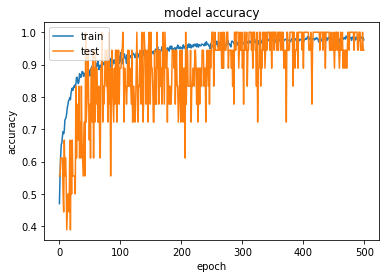

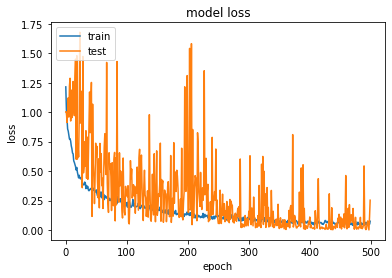

In [14]:
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()